In [1]:
import numpy as np
import pylab
import sklearn.cluster
import skimage.io
import skimage.metrics

In [2]:
# for jupyter to plot in line
%matplotlib inline

Original image


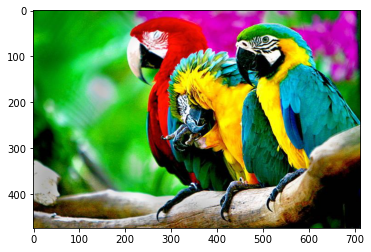

In [3]:
image = skimage.io.imread('parrots.jpg')
pylab.imshow(image)
print('Original image')

In [4]:
image_norm = skimage.img_as_float(image)  # normalize

Создадим матрицу объекты-признаки

In [5]:
(x, y, rgb) = image_norm.shape
objects_features_matrix = np.reshape(image_norm, (x * y, rgb))

Запустим алгоритм K-Means. После выделения кластеров все пиксели, отнесенные в один кластер, попробуем заполнить средним цветом по кластеру

In [6]:
n_colors = 5
kmeans = sklearn.cluster.KMeans(n_clusters=n_colors, init='k-means++', random_state=0)
kmeans.fit_predict(objects_features_matrix)
means = kmeans.cluster_centers_
labels = kmeans.labels_
img_mean = np.copy(objects_features_matrix)
for i,value in enumerate(means):        
    img_mean[labels == i] = value

In [7]:
def recreate_image(codebook, labels, w, h):
    # Recreate the compressed image from the code book & labels
    d = codebook.shape[1]
    image = np.zeros((w, h, d))
    label_idx = 0
    for i in range(w):
        for j in range(h):
            image[i][j] = codebook[labels[label_idx]]
            label_idx += 1
    return image

Image with 5 clusters


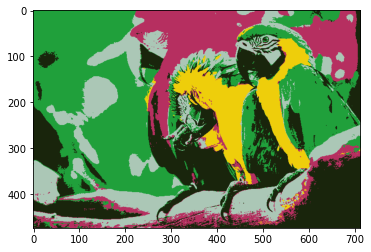

In [8]:
pylab.imshow(recreate_image(means, labels, x, y))
print(f'Image with {np.max(labels)+1} clusters')

In [9]:
print(f'Peak SNR = {skimage.metrics.peak_signal_noise_ratio(objects_features_matrix, img_mean):.4f}')

Peak SNR = 15.5271


Найдем минимальное число кластеров, обеспечивающее SNR не менее 20

Image with 11 clusters yielding SNR = 20 minimum


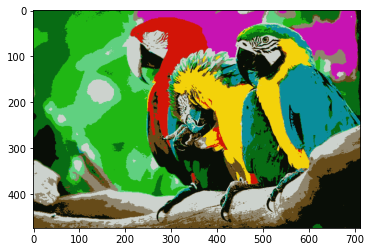

In [10]:
for n_clust in range(2, 20):
    test_img = np.copy(objects_features_matrix)
    kmeans = sklearn.cluster.KMeans(n_clusters=n_clust, init='k-means++', random_state=241)
    kmeans.fit_predict(test_img)
    for i,value in enumerate(kmeans.cluster_centers_):        
        test_img[kmeans.labels_ == i] = value
    if skimage.metrics.peak_signal_noise_ratio(objects_features_matrix, test_img) >= 20:
        n_needed = n_clust
        print(f'Image with {n_needed} clusters yielding SNR = 20 minimum')
        pylab.imshow(recreate_image(kmeans.cluster_centers_, kmeans.labels_, x, y))
        break